# Exercise 3.8

8. This question involves the use of simple linear regression on the Auto
data set.

(a) Use the sm.OLS() function to perform a simple linear regression
with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the
output. For example:

    i. Is there a relationship between the predictor and the response?

    ii. How strong is the relationship between the predictor and
    the response?

    iii. Is the relationship between the predictor and the response
    positive or negative?

    iv. What is the predicted mpg associated with a horsepower of
    98? What are the associated 95 % confdence and prediction
    intervals?

(b) Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defned in the
lab to display the least squares regression line.

(c) Produce some of diagnostic plots of the least squares regression
ft as described in the lab. Comment on any problems you see
with the ft.

In [1]:
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib.axes import Axes
from statsmodels.regression.linear_model import PredictionResults
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [49]:
auto_path = pathlib.Path('../datasets/ALL CSV FILES - 2nd Edition/Auto.csv')
Auto = pd.read_csv(auto_path, na_values=['?']).dropna().set_index('name')
Auto['origin'] = Auto['origin'].astype('category')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [50]:
Auto.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
year               int64
origin          category
dtype: object

<Axes: xlabel='horsepower', ylabel='mpg'>

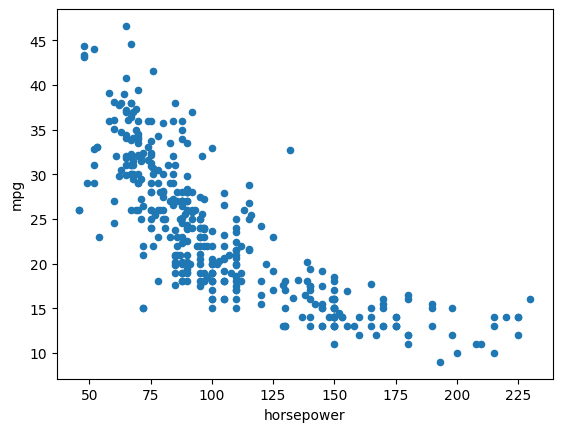

In [44]:
Auto.plot.scatter(x='horsepower', y='mpg')

In [77]:
X = Auto[['horsepower']].copy()
X['intercept'] = 1.0
y = Auto['mpg']
model = sm.OLS(y, X)
results = model.fit()

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           7.03e-81
Time:                        00:41:15   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
pred_results = results.get_prediction([98, 1])
ci = pred_results.conf_int()
pi = pred_results.conf_int(obs=True)

print(f"Predicted value: {pred_results.predicted}")
print(f"95% CI: {ci}")
print(f"95% PI: {pi}")

Predicted value: [24.46707715]
95% CI: [[23.97307896 24.96107534]]
95% PI: [[14.80939607 34.12475823]]


(a)

    i. There is a relationship between horsepower and mpg as evidenced by the ~0 p-value and high T-stat magnitude
    ii. Relationship has a beta of -0.1578. For every unit increase in horsepower, there is a decrease of 0.1578 mpg.
    iii. Relationship is negative -> mpg goes up when horsepower goes down and vice versa
    iv. Predicted value: [24.46707715]
        95% CI: [[23.97307896 24.96107534]]
        95% PI: [[14.80939607 34.12475823]]

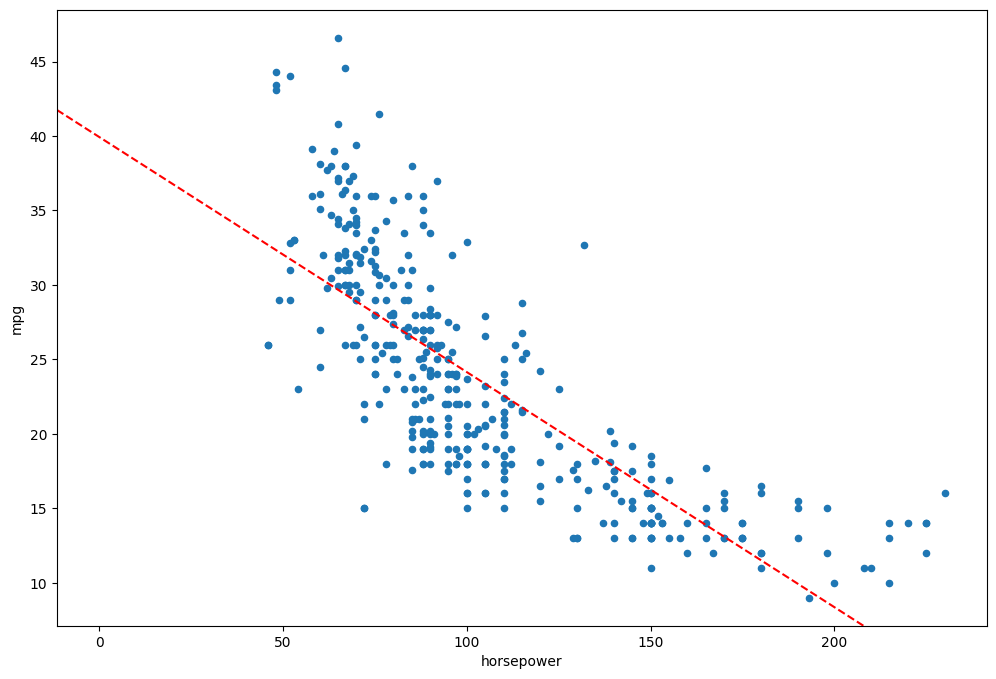

In [53]:
def abline(intercept: float, slope: float, ax: Axes) -> None:
    ax.axline((0, intercept), slope=slope, linestyle="--", color="red")

fig, ax = plt.subplots(1, 1, figsize=(12,8))
Auto.plot.scatter(x='horsepower', y='mpg', ax=ax)
abline(results.params['intercept'], results.params['horsepower'], ax)

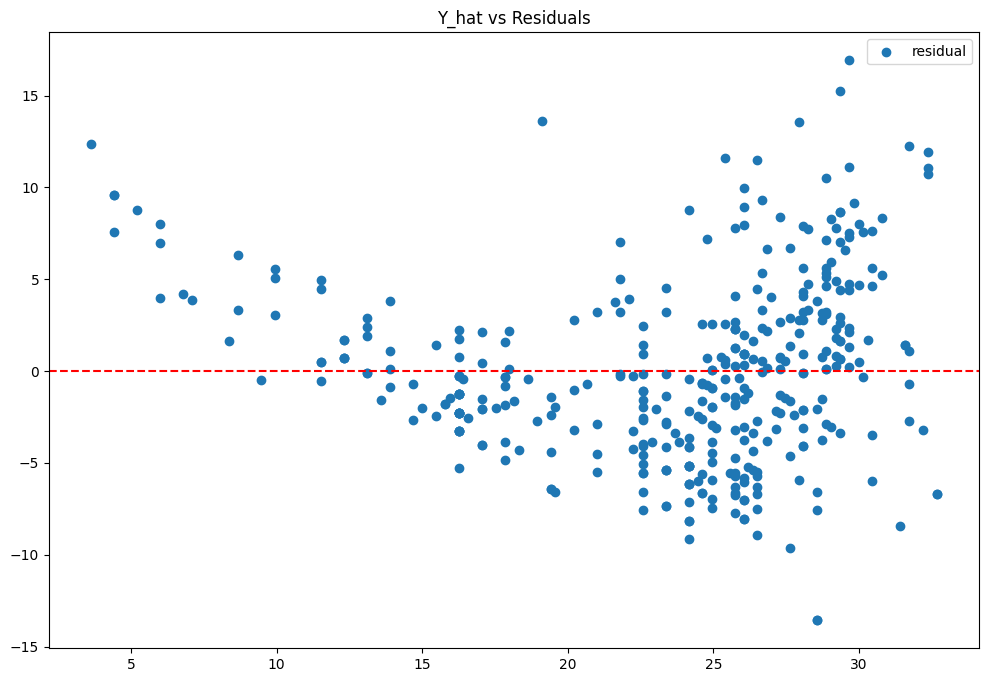

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.scatter(x=results.fittedvalues, y=results.resid, label='residual')
ax.set_title('Y_hat vs Residuals')
ax.axhline(0, linestyle='--', color='red')
ax.legend()

115

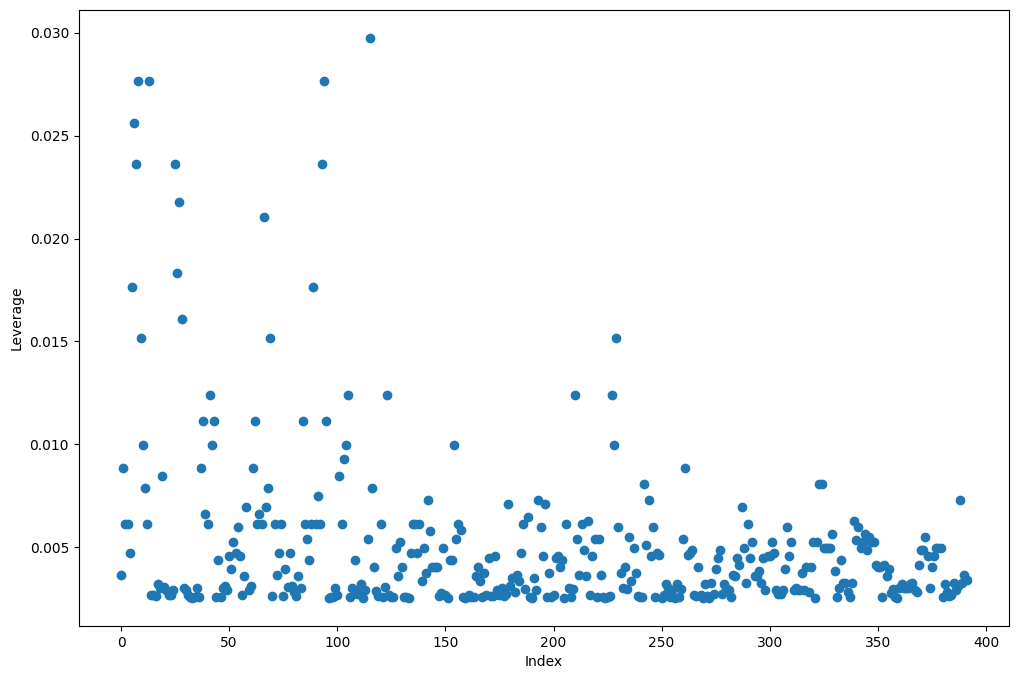

In [68]:
infl = results.get_influence()
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(x=np.arange(X.shape[0]), y=infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

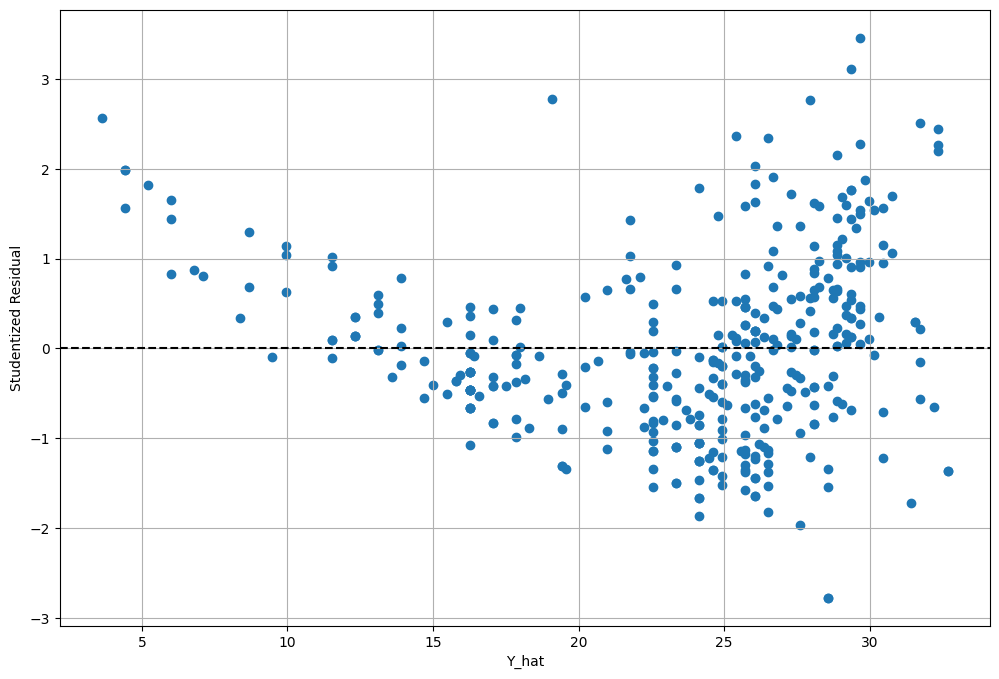

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(x=results.fittedvalues, y=infl.resid_studentized)
ax.set_xlabel('Y_hat')
ax.set_ylabel('Studentized Residual')
ax.axhline(0, color='black', linestyle='--')
ax.grid(True)

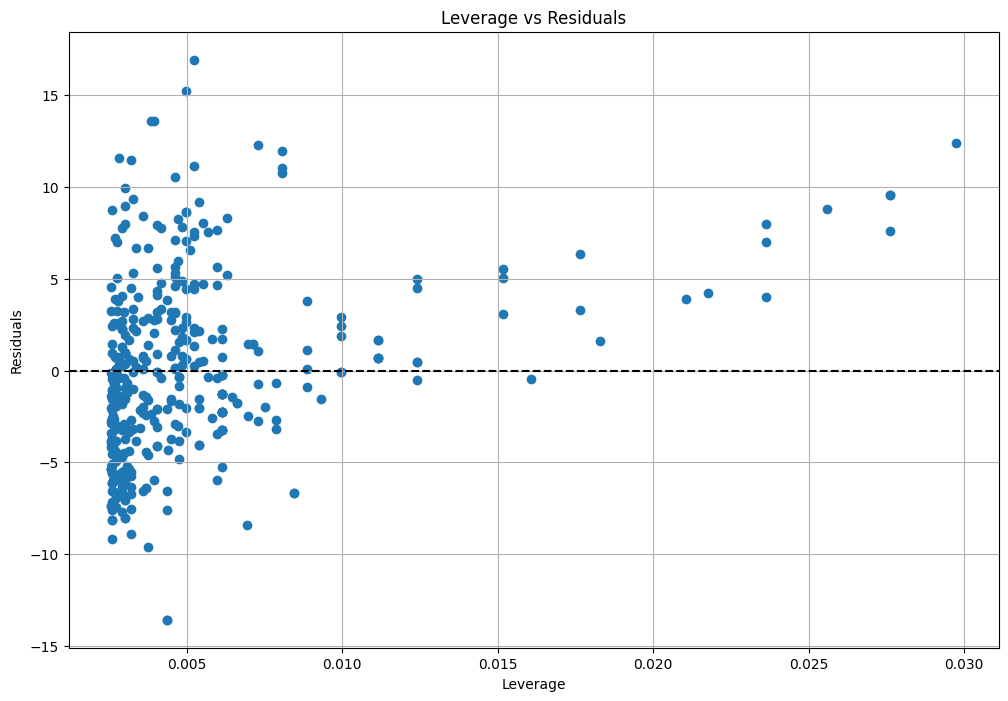

In [95]:
infl = results.get_influence()
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.scatter(x=infl.hat_matrix_diag, y=infl.resid)
ax.axhline(0, linestyle='--', color='black')

ax.set_xlabel('Leverage')
ax.set_ylabel('Residuals')
ax.set_title('Leverage vs Residuals')
ax.grid()

c) 
* Evidence of non-linearity from residual plot - 'U' shape
* Some high leverage points

# Exercise 3.9

 This question involves the use of multiple linear regression on the
Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables
in the data set.

(b) Compute the matrix of correlations between the variables using
the DataFrame.corr() method. .corr()

(c) Use the sm.OLS() function to perform a multiple linear regression
with mpg as the response and all other variables except name as
the predictors. Use the summarize() function to print the results.

    Comment on the output. For instance:
    
    i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to
    answer this question.
    
    ii. Which predictors appear to ha
    ve a statistically signifcant
    relationship to the response?
    iii. What does the coefcient for the year variable suggest?

(d) Produce some of diagnostic plots of the linear regression ft as
described in the lab. Comment on any problems you see with the
ft. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

(e) Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically signifcant?

(f) Try a few diferent transformations of the variables, such as
log(X),√X, X2. Comment on your findings.

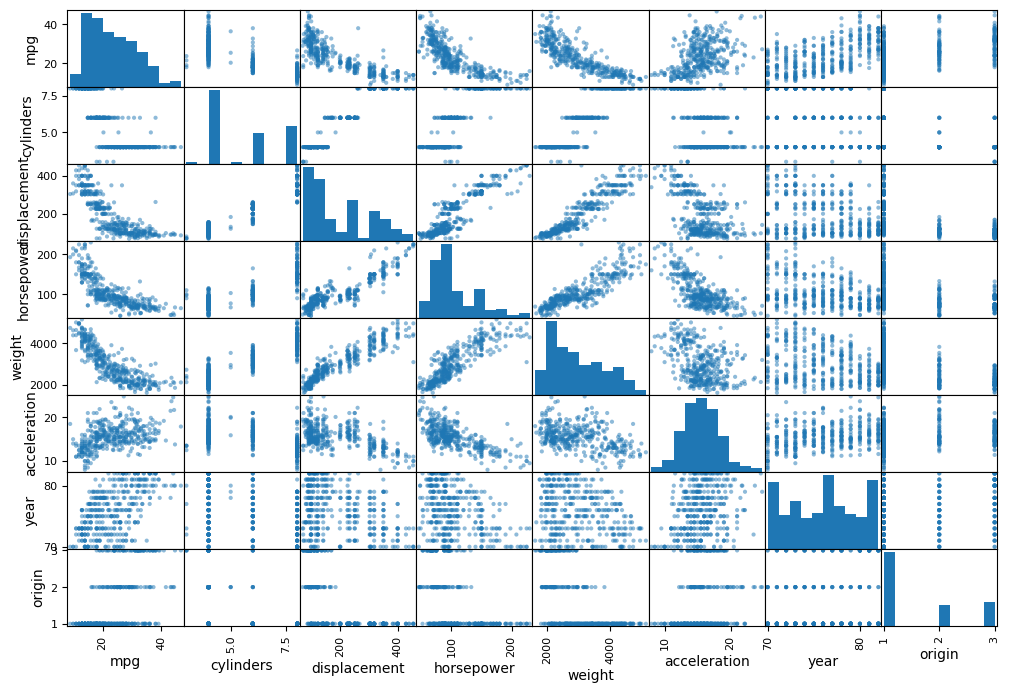

In [3]:
pd.plotting.scatter_matrix(Auto, figsize=(12,8));

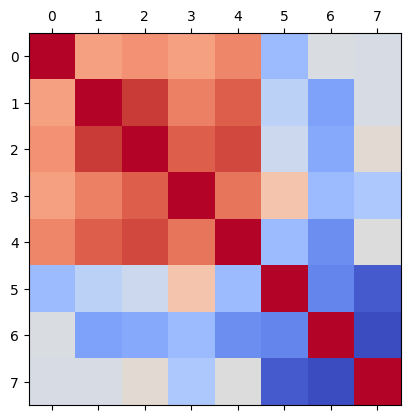

In [4]:
corr = Auto.corr().round(2)
abs_corr = corr.abs()

plt.matshow(abs_corr, cmap='coolwarm');

In [5]:
corr.style.background_gradient(cmap='coolwarm')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.780000,-0.810000,-0.780000,-0.830000,0.420000,0.580000,0.570000
cylinders,-0.780000,1.000000,0.950000,0.840000,0.900000,-0.500000,-0.350000,-0.570000
displacement,-0.810000,0.950000,1.000000,0.900000,0.930000,-0.540000,-0.370000,-0.610000
horsepower,-0.780000,0.840000,0.900000,1.000000,0.860000,-0.690000,-0.420000,-0.460000
weight,-0.830000,0.900000,0.930000,0.860000,1.000000,-0.420000,-0.310000,-0.590000
acceleration,0.420000,-0.500000,-0.540000,-0.690000,-0.420000,1.000000,0.290000,0.210000
year,0.580000,-0.350000,-0.370000,-0.420000,-0.310000,0.290000,1.000000,0.180000
origin,0.570000,-0.570000,-0.610000,-0.460000,-0.590000,0.210000,0.180000,1.000000


In [6]:
from ISLP.models import (
    ModelSpec as MS,
    summarize,
    poly
)

In [51]:
terms = Auto.columns.drop('mpg')
model_spec = MS(terms)
X = model_spec.fit_transform(Auto)
y = Auto['mpg']
X.head()

,intercept,cylinders,displacement,horsepower,weight,acceleration,year,origin[2],origin[3]
name,,,,,,,,,
chevrolet chevelle malibu,1.0,8,307.0,130.0,3504,12.0,70,0.0,0.0
buick skylark 320,1.0,8,350.0,165.0,3693,11.5,70,0.0,0.0
plymouth satellite,1.0,8,318.0,150.0,3436,11.0,70,0.0,0.0
amc rebel sst,1.0,8,304.0,150.0,3433,12.0,70,0.0,0.0
ford torino,1.0,8,302.0,140.0,3449,10.5,70,0.0,0.0


In [62]:
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.9546,4.677,-3.839,0.000
cylinders,-0.4897,0.321,-1.524,0.128
displacement,0.0240,0.008,3.133,0.002
horsepower,-0.0182,0.014,-1.326,0.185
weight,-0.0067,0.001,-10.243,0.000
acceleration,0.0791,0.098,0.805,0.421
year,0.7770,0.052,15.005,0.000
origin[2],2.6300,0.566,4.643,0.000
origin[3],2.8532,0.553,5.162,0.000


In [63]:
vifs = [(X.columns[i], VIF(X, i)) for i in range(1, X.shape[1])]
vifs

[('cylinders', 10.7377712428099),
 ('displacement', 22.937949637592585),
 ('horsepower', 9.95726503101407),
 ('weight', 11.074349163419294),
 ('acceleration', 2.6259058004716924),
 ('year', 1.3013727613032715),
 ('origin[2]', 1.649270997811548),
 ('origin[3]', 1.7626923812088569)]

In [64]:
X.columns

Index(['intercept', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin[2]', 'origin[3]'],
      dtype='object')

In [65]:
formula = " + ".join(terms)
fit_formula = f"mpg ~ {formula}"
print(f"Formula: {fit_formula}")

Formula: mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin


In [66]:
model = smf.ols(fit_formula, data=Auto)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
Intercept,-17.9546,4.677,-3.839,0.000
origin[T.2],2.6300,0.566,4.643,0.000
origin[T.3],2.8532,0.553,5.162,0.000
cylinders,-0.4897,0.321,-1.524,0.128
displacement,0.0240,0.008,3.133,0.002
horsepower,-0.0182,0.014,-1.326,0.185
weight,-0.0067,0.001,-10.243,0.000
acceleration,0.0791,0.098,0.805,0.421
year,0.7770,0.052,15.005,0.000


In [67]:
anova_lm(results).round(2)

,df,sum_sq,mean_sq,F,PR(>F)
origin,2.0,7904.29,3952.15,361.48,0.00
cylinders,1.0,7067.30,7067.30,646.41,0.00
displacement,1.0,793.51,793.51,72.58,0.00
horsepower,1.0,584.19,584.19,53.43,0.00
weight,1.0,819.51,819.51,74.96,0.00
acceleration,1.0,1.17,1.17,0.11,0.74
year,1.0,2461.64,2461.64,225.15,0.00
Residual,383.0,4187.39,10.93,NaN,NaN


c)

    i. All predictors except acceleration have high F-statistic and low p-values. This is evidence in favour of them having predicting power.
    ii. All except acceleration
    iii. Coefficient of year is 0.75 -> cars manufactured more recently have higher mpg
    

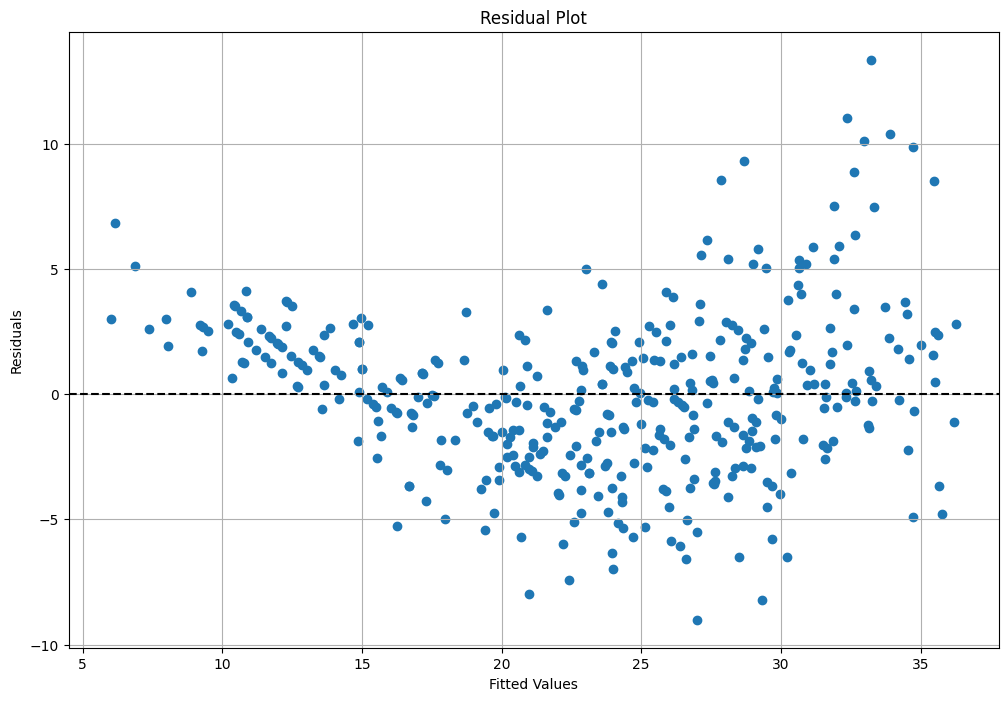

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.scatter(x=results.fittedvalues, y=results.resid)

ax.set_title('Residual Plot')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.grid(True)

ax.axhline(0, color='black', linestyle='--');


/tmp/ipykernel_16240/1350535538.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


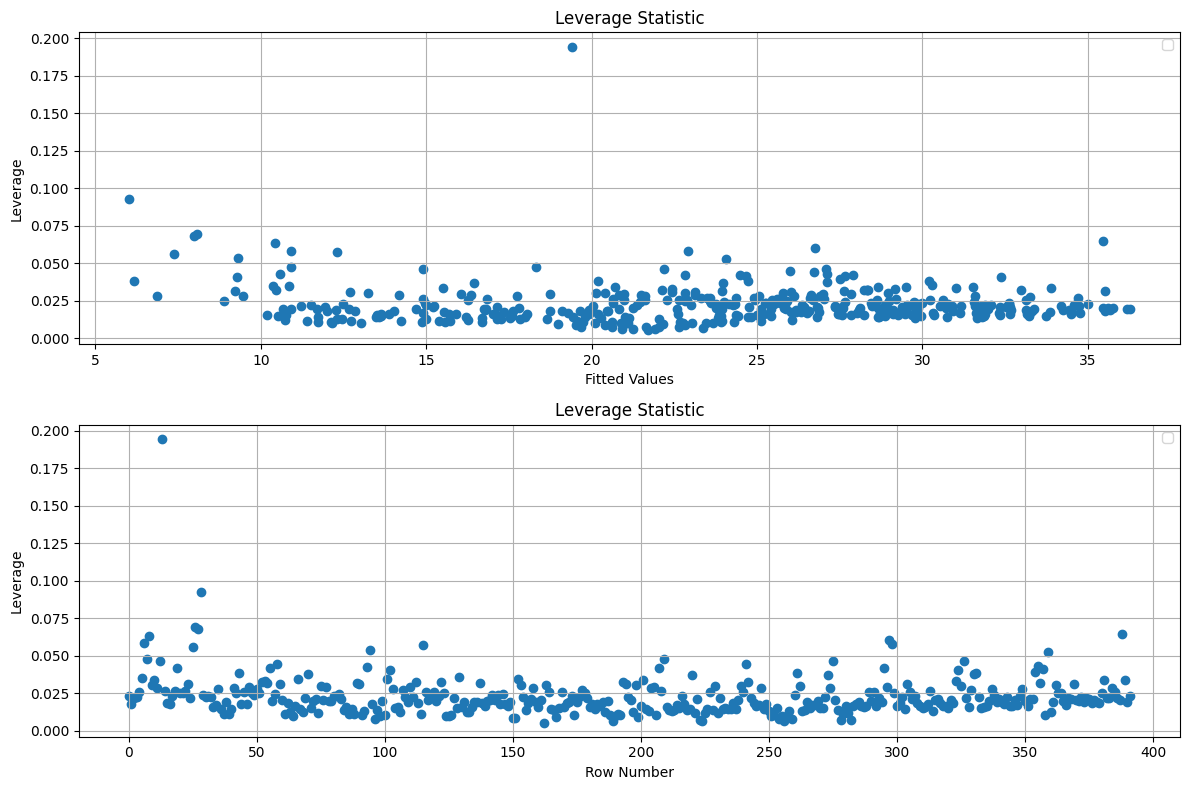

In [59]:
fig, axs = plt.subplots(2, 1, figsize=(12,8))
infl = results.get_influence()

axs[0].scatter(x=results.fittedvalues, y=infl.hat_matrix_diag)
axs[0].set_title('Leverage Statistic')
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Leverage')

axs[1].scatter(x=np.arange(results.fittedvalues.shape[0]), y=infl.hat_matrix_diag)
axs[1].set_title('Leverage Statistic')
axs[1].set_xlabel('Row Number')
axs[1].set_ylabel('Leverage')

for ax in axs:
    ax.legend()
    ax.grid(True)

fig.tight_layout()

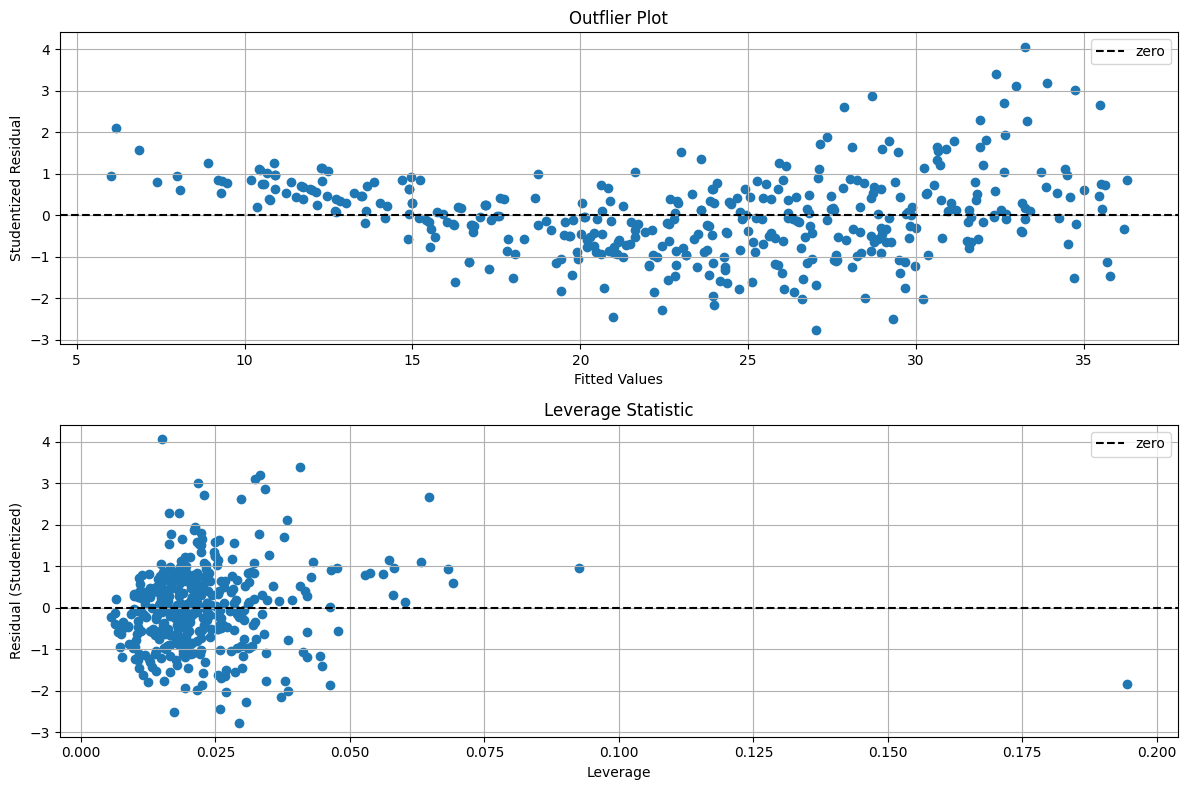

In [60]:
fig, axs = plt.subplots(2, 1, figsize=(12,8))
infl = results.get_influence()

axs[0].scatter(x=results.fittedvalues, y=infl.resid_studentized)
axs[0].set_title('Outflier Plot')
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Studentized Residual')

axs[1].scatter(x=infl.hat_matrix_diag, y=infl.resid_studentized)
axs[1].set_title('Leverage Statistic')
axs[1].set_xlabel('Leverage')
axs[1].set_ylabel('Residual (Studentized)')

for ax in axs:
    ax.axhline(0, color='black', linestyle='--', label='zero')
    ax.legend()
    ax.grid(True)

fig.tight_layout()

d) Clear evidence of non-linearity. A couple of high-leverage points present, but not sure what's the best way to address them in multi-dimensional space

In [90]:
interaction_terms = []
for i, term in enumerate(terms):
    for j in range(i + 1, len(terms)):
        other_term = terms[j]
        
        interaction_terms.append((term, other_term))

interaction_terms = pd.Index(interaction_terms)
print(f"Interaction terms: {interaction_terms}")

Interaction terms: MultiIndex([(   'cylinders', 'displacement'),
            (   'cylinders',   'horsepower'),
            (   'cylinders',       'weight'),
            (   'cylinders', 'acceleration'),
            (   'cylinders',         'year'),
            (   'cylinders',       'origin'),
            ('displacement',   'horsepower'),
            ('displacement',       'weight'),
            ('displacement', 'acceleration'),
            ('displacement',         'year'),
            ('displacement',       'origin'),
            (  'horsepower',       'weight'),
            (  'horsepower', 'acceleration'),
            (  'horsepower',         'year'),
            (  'horsepower',       'origin'),
            (      'weight', 'acceleration'),
            (      'weight',         'year'),
            (      'weight',       'origin'),
            ('acceleration',         'year'),
            ('acceleration',       'origin'),
            (        'year',       'origin')],
           )


In [91]:
all_terms = list(terms) + list(interaction_terms)
X = MS(all_terms).fit_transform(Auto)
y = Auto['mpg']
model = sm.OLS(y, X)
result = model.fit()
summarize(result).sort_values(by='t')

,coef,std err,t,P>|t|
acceleration,-6.048300,2.147000,-2.818,0.005
origin[2],-35.165100,12.602000,-2.790,0.006
origin[3],-37.646400,14.261000,-2.640,0.009
displacement,-0.352900,0.197000,-1.788,0.075
horsepower:year,-0.006400,0.004000,-1.652,0.099
cylinders:year,-0.144700,0.097000,-1.499,0.135
weight:origin[3],-0.004500,0.003000,-1.292,0.197
horsepower:weight,-0.000034,0.000030,-1.153,0.250
cylinders:displacement,-0.006300,0.007000,-0.889,0.375
horsepower:acceleration,-0.003400,0.004000,-0.875,0.382


In [160]:
basic_terms = ' + '.join(terms)
interaction_terms = 'weight:horsepower + horsepower:displacement + displacement:weight'

full_rhs = f"{basic_terms} + {interaction_terms}"
anova_formula = f"mpg ~ {full_rhs}"

print(anova_formula)

model = smf.ols(anova_formula, data=Auto)
anova_results = model.fit()

mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + weight:horsepower + horsepower:displacement + displacement:weight


In [161]:
anova_summ = summarize(anova_results).sort_values(by='t')
anova_summ

,coef,std err,t,P>|t|
weight,-0.007200,0.002000,-4.463,0.000
horsepower,-0.181800,0.047000,-3.838,0.000
displacement,-0.055500,0.025000,-2.263,0.024
acceleration,-0.131600,0.098000,-1.345,0.179
Intercept,-0.376900,4.738000,-0.080,0.937
displacement:weight,0.000006,0.000005,1.047,0.296
weight:horsepower,0.000016,0.000015,1.072,0.285
cylinders,0.410700,0.319000,1.287,0.199
origin[T.2],1.160200,0.534000,2.171,0.031
origin[T.3],1.277100,0.528000,2.420,0.016


In [162]:
anova_stats = anova_lm(anova_results, typ=2).sort_values(by='F').round(3)
anova_stats

,sum_sq,df,F,PR(>F)
displacement:weight,9.163,1.0,1.096,0.296
weight:horsepower,9.607,1.0,1.149,0.285
cylinders,13.857,1.0,1.657,0.199
displacement,14.791,1.0,1.769,0.184
acceleration,15.133,1.0,1.809,0.179
origin,57.814,2.0,3.456,0.033
horsepower,64.283,1.0,7.686,0.006
horsepower:displacement,66.093,1.0,7.902,0.005
weight,201.462,1.0,24.088,0.000
year,2308.825,1.0,276.059,0.000


In [145]:
anova_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          1.21e-158
Time:                        00:37:21   Log-Likelihood:                -966.41
No. Observations:                 392   AIC:                             1957.
Df Residuals:                     380   BIC:                             2004.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.3769      4.738     -0.080      0.937      -9.693       8.940
origin[T.2]                 1.1602      0.534      2.171      0.031       0.109       2.211
origin[T.3]                 1.2771      0.528      2.420      0.016       0.239       2.315
cylinders                   0.4107      0.319      1.287      0.199      -0.217       1.038
displacement               -0.0555      0.025     -2.263      0.024      -0.104      -0.007
horsepower                 -0.1818      0.047     -3.838      0.000      -0.275      -0.089
weight                     -0.0072      0.002     -4.463      0.000      -0.010      -0.004
acceleration               -0.1316      0.098     -1.345      0.179      -0.324       0.061
year                        0.7694      0.046     16.615      0.000       0.678       0.860
weight:horsepower        1.636e-05   1.53e-05      1.072      0.285   -1.37e-05    4.64e-05
horsepower:displacement     0.0003      0.000      2.811      0.005    8.45e-05       0.000
displacement:weight       5.69e-06   5.44e-06      1.047      0.296      -5e-06    1.64e-05
==============================================================================
Omnibus:                       40.304   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.784
Skew:                           0.589   Prob(JB):                     7.80e-18
Kurtosis:                       4.853   Cond. No.                     3.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
filtered_terms = anova_stats.loc[anova_stats['F'] > 2.5].index
filtered_terms

Index(['origin', 'horsepower', 'horsepower:displacement', 'weight', 'year'], dtype='object')

In [164]:
filtered_formula = f"mpg ~ {' + '.join(f for f in filtered_terms if not f.endswith(']'))}"
filtered_model = smf.ols(filtered_formula, data=Auto)
filtered_results = filtered_model.fit()

In [169]:
filtered_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     354.5
Date:                Wed, 11 Jun 2025   Prob (F-statistic):          2.11e-153
Time:                        00:52:17   Log-Likelihood:                -993.56
No. Observations:                 392   AIC:                             2001.
Df Residuals:                     385   BIC:                             2029.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -11.9586      3.919     -3.051      0.002     -19.664      -4.253
origin[T.2]                 2.6696      0.486      5.491      0.000       1.714       3.625
origin[T.3]                 2.8000      0.488      5.742      0.000       1.841       3.759
horsepower                 -0.1131      0.015     -7.397      0.000      -0.143      -0.083
horsepower:displacement     0.0002   2.86e-05      8.285      0.000       0.000       0.000
weight                     -0.0065      0.000    -15.440      0.000      -0.007      -0.006
year                        0.7894      0.048     16.532      0.000       0.696       0.883
==============================================================================
Omnibus:                       16.911   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.295
Skew:                           0.342   Prob(JB):                     5.30e-06
Kurtosis:                       4.010   Cond. No.                     8.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
anova_lm(filtered_results, typ=2)

,sum_sq,df,F,PR(>F)
origin,421.756991,2.0,22.240946,7.232783e-10
horsepower,9.179912,1.0,0.968188,3.257506e-01
horsepower:displacement,650.835328,1.0,68.642339,1.980306e-15
weight,2260.379810,1.0,238.397873,3.347591e-42
year,2591.346206,1.0,273.304257,8.960016e-47
Residual,3650.394258,385.0,NaN,NaN


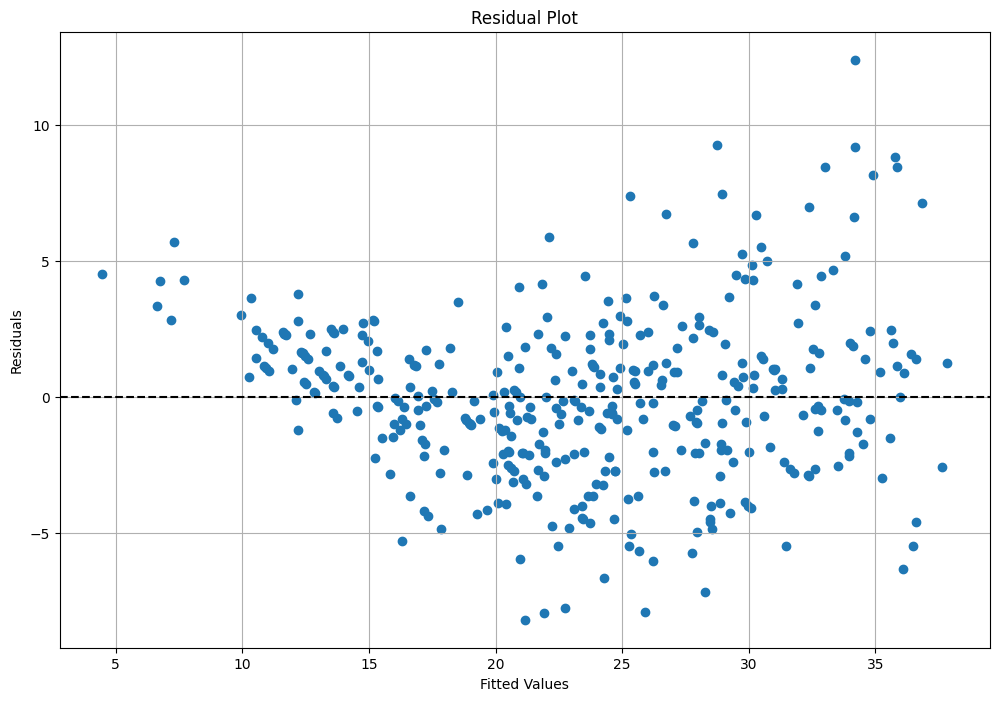

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.scatter(x=filtered_results.fittedvalues, y=filtered_results.resid)

ax.set_title('Residual Plot')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.grid(True)

ax.axhline(0, color='black', linestyle='--');

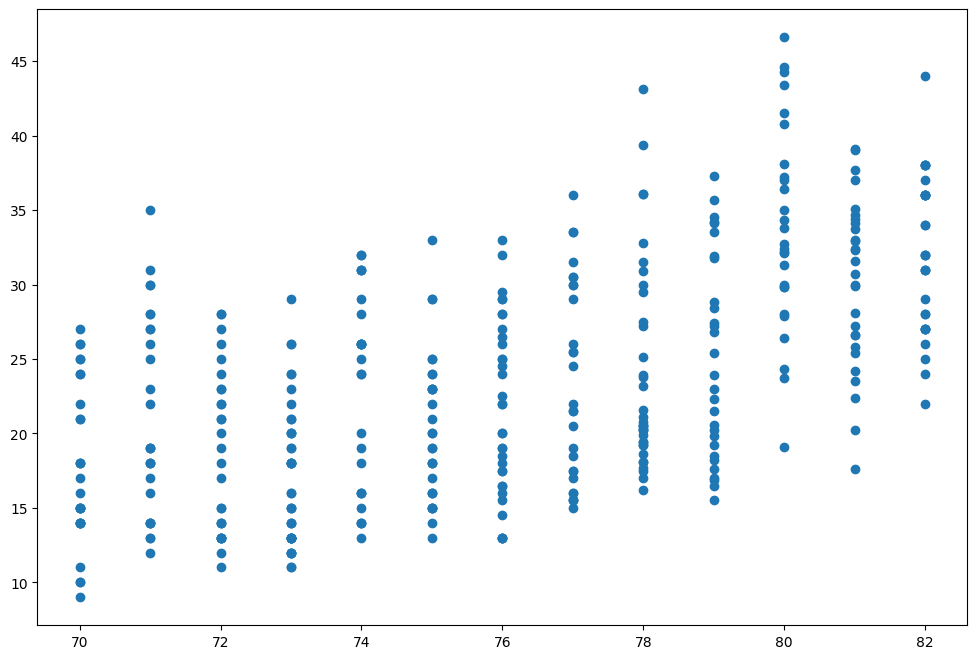

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.scatter(x=Auto['year'], y=y)
plt.show()

In [171]:
vifs

[('cylinders', 10.7377712428099),
 ('displacement', 22.937949637592585),
 ('horsepower', 9.95726503101407),
 ('weight', 11.074349163419294),
 ('acceleration', 2.6259058004716924),
 ('year', 1.3013727613032715),
 ('origin[2]', 1.649270997811548),
 ('origin[3]', 1.7626923812088569)]